In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage  # Used skimage as noise functions
from IPython.display import clear_output


(256, 256)

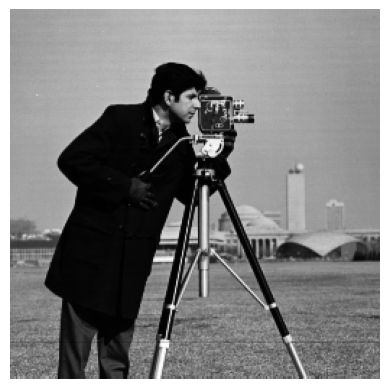

In [22]:
#Original image
img7 = cv2.imread('/content/cameraman.tif',cv2.IMREAD_GRAYSCALE)
plt.imshow(img7,cmap='gray')
plt.axis("off")

img7.shape

<ipython-input-24-7bc2cc326016>:11: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum2 = 20*np.log(np.abs(dft_shift2))


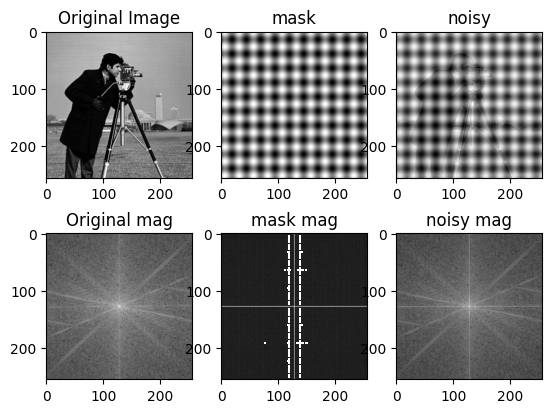

In [24]:
#org image
dft = np.fft.fft2(img7)
dft_shift = np.fft.fftshift(dft)
phase_spectrum = np.angle(dft_shift)
magnitude_spectrum = 20*np.log(np.abs(dft_shift))

#mask image
dft2 = np.fft.fft2(p)
dft_shift2 = np.fft.fftshift(dft2)
phase_spectrum2 = np.angle(dft_shift2)
magnitude_spectrum2 = 20*np.log(np.abs(dft_shift2))

#noisy image
dft3 = np.fft.fft2(imgn)
dft_shift3 = np.fft.fftshift(dft3)
phase_spectrum3 = np.angle(dft_shift3)
magnitude_spectrum3 = 20*np.log(np.abs(dft_shift3))

#plot
plt.subplot(2,3,1)
plt.imshow(img7, cmap='gray')
plt.title('Original Image')
plt.subplot(2,3,2)
plt.imshow(p, cmap='gray')
plt.title('mask')
plt.subplot(2,3,3)
plt.imshow(imgn, cmap='gray')
plt.title('noisy')
plt.subplot(2,3,4)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original mag')
plt.subplot(2,3,5)
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.title('mask mag')
plt.subplot(2,3,6)
plt.imshow(magnitude_spectrum3, cmap='gray')
plt.title('noisy mag')
plt.show()

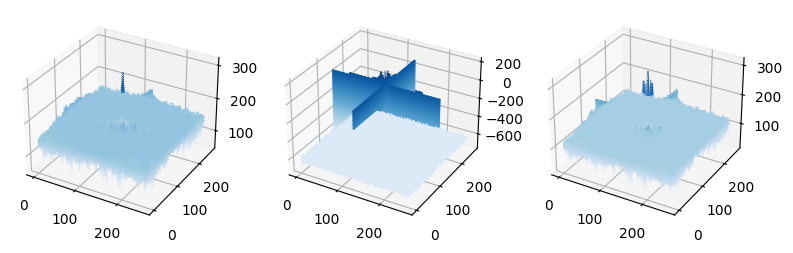

In [25]:
# ax = plt.axes(projection='3d')
t = np.arange(0,256,1)
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.contour3D(t,t, magnitude_spectrum,50,cmap='Blues')
ax2.contour3D(t,t, magnitude_spectrum2,50,cmap='Blues')
ax3.contour3D(t,t, magnitude_spectrum3,50,cmap='Blues')

plt.show()

<ipython-input-32-726219698aec>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  ffshift[u][:] = fshift[v] * (1.0 / (1 + pow((d0 * d0) / (d1 * d2),order)))
<ipython-input-32-726219698aec>:15: RuntimeWarning: divide by zero encountered in true_divide
  ffshift[u][:] = fshift[v] * (1.0 / (1 + pow((d0 * d0) / (d1 * d2),order)))


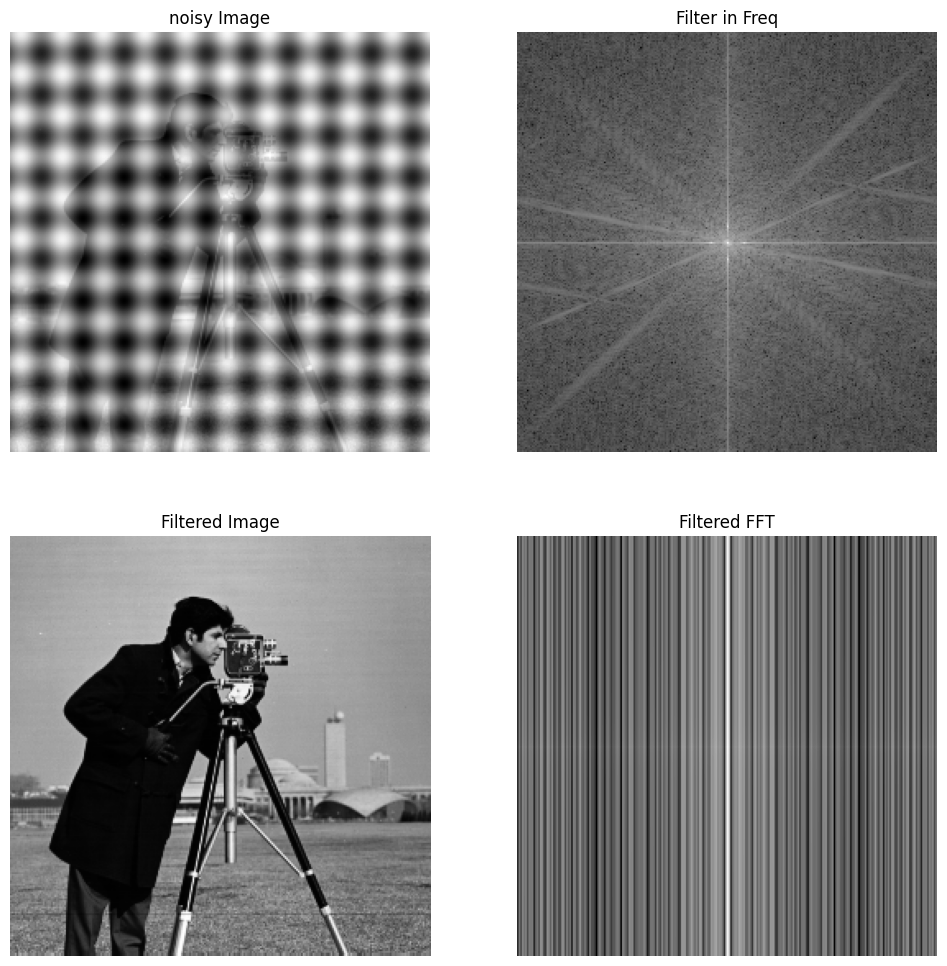

In [32]:
# Butterworth notch filter

def ButterworthNotchFilter(fshift, points, d0, order = 1):
    m = fshift.shape[0]
    n = fshift.shape[1]
    ffshift = np.zeros((m,n))
    for u in range(m):
        for v in range(n):
            for d in range(len(points)):
                  u0 = points[d][0]
                  v0 = points[d][1]
                  u0, v0 = v0, u0
                  d1 = pow(pow(u - u0, 2) + pow(v - v0, 2), 0.5)
                  d2 = pow(pow(u + u0, 2) + pow(v + v0, 2), 0.5)
                  ffshift[u][:] = fshift[v] * (1.0 / (1 + pow((d0 * d0) / (d1 * d2),order))) 
                    
    f_ishift = np.fft.ifftshift(ffshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back
imgx = cv2.imread('/content/images.jpg',cv2.IMREAD_GRAYSCALE)
NF = []
NF.append(1 - np.exp(-a1*(x-190)**2 - a2*(y-123)**2))
NF.append(1 - np.exp(-a1*(x-104)**2 - a2*(y-172)**2) )
NF.append(1 - np.exp(-a1*(x-126)**2 - a2*(y-135)**2) )
NF.append(1 - np.exp(-a1*(x-168)**2 - a2*(y-161)**2) )
image1 = ButterworthNotchFilter(dft_shift3,NF,121,1)
fshift1 = np.fft.fft2(image1)
f_ishift1 = np.fft.ifftshift(fshift1)

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('noisy Image')
plt.imshow(imgn, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Filter in Freq')
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Filtered Image')
plt.imshow(np.real(img7), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(f_ishift1)), cmap = 'gray')
plt.axis('off')

plt.show()
